In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import os

In [3]:
def Kmeans_with_plot(data,n_clusters):
    clf = KMeans(n_clusters=n_clusters)
    clf.fit(data)  
    centers = clf.cluster_centers_ 
    labels = clf.labels_  
    colors=['red','orange','yellow','green','blue','purple','black']
    for i in range(len(labels)):
        plt.scatter(data[i][0], data[i][1], c=colors[labels[i]])
    plt.scatter(centers[:,0],centers[:,1],marker='*', s=100)
    
def Hierarchical_with_plot(data,n_clusters):
    ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='single').fit(data)
    labels = ward.labels_
    colors=['red','orange','yellow','green','blue','purple','black']
    for i in range(len(labels)):
        plt.scatter(data[i][0], data[i][1], c=colors[labels[i]])
        
def Hierarchical_with_dendrogram(data):        
    linked = linkage(data, 'single')
    labelList = range(1, data.shape[0]+1)
    dendrogram(linked,
                orientation='top',
                labels=labelList,
                distance_sort='descending',
                show_leaf_counts=True)
    plt.xticks([]),plt.yticks([])
        
def DBSCAN_with_plot(data,eps,min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    labels = db.labels_
    colors=['red','orange','yellow','green','blue','purple','black']
    for i in range(len(labels)):
        plt.scatter(data[i][0], data[i][1], c=colors[labels[i]])

## Data Overview

Text(0.5, 0.98, 'View Data')

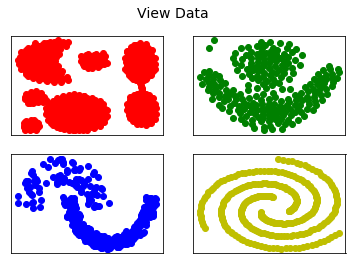

In [4]:
root=r'C:\Users\sujun\Desktop\STAT 6240\Homework2\Clustering-dataset'
df=[]
for file in os.listdir(root):
    df.append(pd.read_table(root+os.sep+file))
for i,color in enumerate("rgby"):
    plt.subplot(221+i)
    plt.scatter(df[i]['Column1'].values,df[i]['Column2'].values,color=color) 
    plt.xticks([]),plt.yticks([])
plt.suptitle('View Data', fontsize=14)

## K-means clustering

Text(0.5, 0.98, 'K-means clustering')

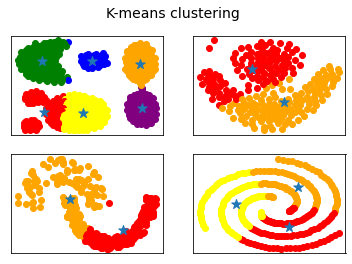

In [5]:
n_clusters=[6,2,2,3]
for i in range(4):
    plt.subplot(221+i)
    Kmeans_with_plot(df[i].iloc[:,:2].values,n_clusters[i])
    plt.xticks([]),plt.yticks([])
plt.suptitle('K-means clustering', fontsize=14)

### How to decide the number of centroids

Text(0.5, 0.98, 'K-means clustering - Data1')

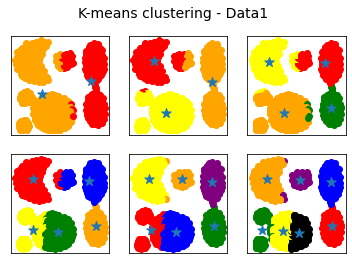

In [6]:
for i in range(6):
    plt.subplot(231+i)
    Kmeans_with_plot(df[0].iloc[:,:2].values,i+2)
    plt.xticks([]),plt.yticks([])
plt.suptitle('K-means clustering - Data1', fontsize=14)

Text(0.5, 0.98, 'K-means clustering - Data3')

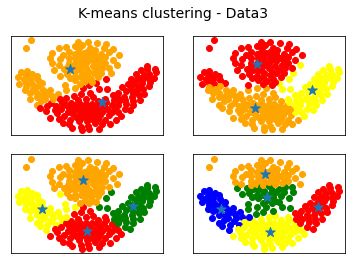

In [7]:
for i in range(4):
    plt.subplot(221+i)
    Kmeans_with_plot(df[1].iloc[:,:2].values,i+2)
    plt.xticks([]),plt.yticks([])
plt.suptitle('K-means clustering - Data3', fontsize=14)

Text(0.5, 0.98, 'K-means clustering - Data4')

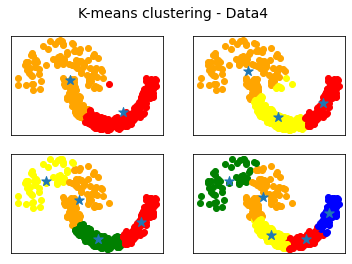

In [8]:
for i in range(4):
    plt.subplot(221+i)
    Kmeans_with_plot(df[2].iloc[:,:2].values,i+2)
    plt.xticks([]),plt.yticks([])
plt.suptitle('K-means clustering - Data4', fontsize=14)

Text(0.5, 0.98, 'K-means clustering - Data5')

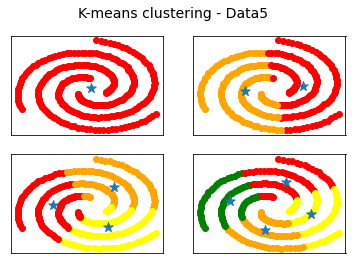

In [9]:
for i in range(4):
    plt.subplot(221+i)
    Kmeans_with_plot(df[3].iloc[:,:2].values,i+1)
    plt.xticks([]),plt.yticks([])
plt.suptitle('K-means clustering - Data5', fontsize=14)

## Hierarchical clustering

Text(0.5, 0.98, 'Hierarchical clustering - single')

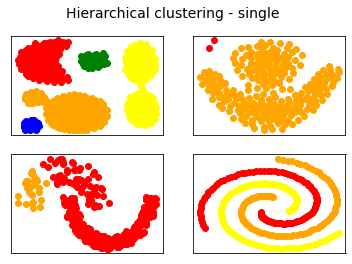

In [10]:
n_clusters=[5,2,2,3]
for i in range(4):
    plt.subplot(221+i)
    Hierarchical_with_plot(df[i].iloc[:,:2].values,n_clusters[i])
    plt.xticks([]),plt.yticks([])
plt.suptitle('Hierarchical clustering - single', fontsize=14)

Text(0.5, 0.98, 'Hierarchical clustering - single')

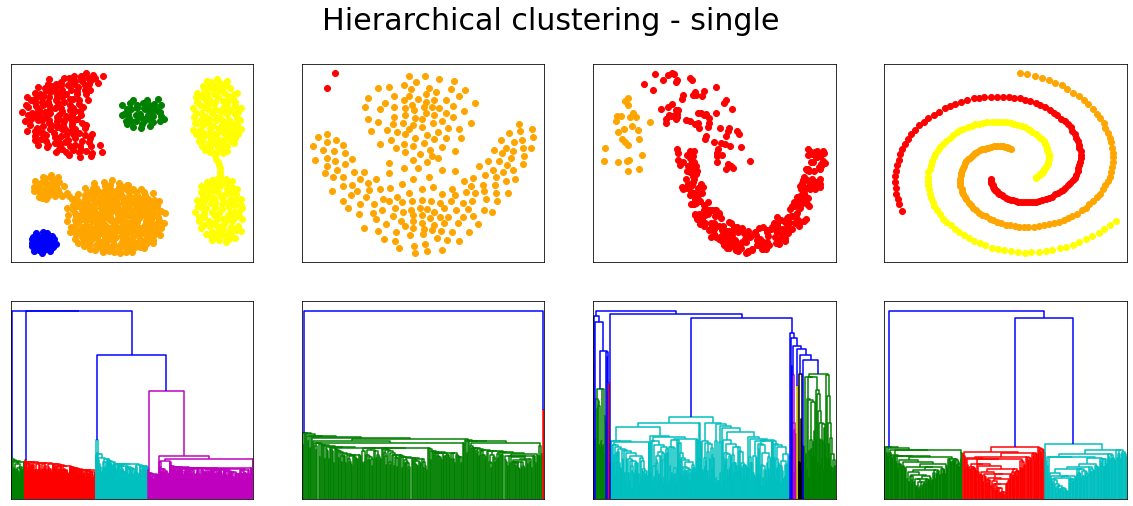

In [11]:
n_clusters=[5,2,2,3]
plt.figure(figsize=(20, 8))
for i in range(4):
    plt.subplot(241+i)
    Hierarchical_with_plot(df[i].iloc[:,:2].values,n_clusters[i])
    plt.xticks([]),plt.yticks([])
    plt.subplot(245+i)
    Hierarchical_with_dendrogram(df[i].iloc[:,:2].values)
    plt.xticks([]),plt.yticks([])
plt.suptitle('Hierarchical clustering - single', fontsize=30)

## DBSCAN Clustering

Text(0.5, 0.98, 'DBSCAN clustering')

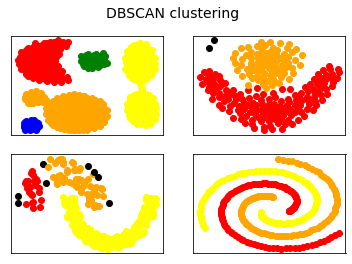

In [12]:
eps=[2,1.4,2.5,2.1]
min_samples=[10,10,7,5]
for i in range(4):
    plt.subplot(221+i)
    DBSCAN_with_plot(df[i].iloc[:,:2].values,eps[i],min_samples[i])
    plt.xticks([]),plt.yticks([])
plt.suptitle('DBSCAN clustering', fontsize=14)